In [75]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
x = np.random.rand(100,1)
y =1+1.5*x + np.random.rand(100,1)
ones  = np.ones((100,1))
x_new = np.hstack((ones,x))

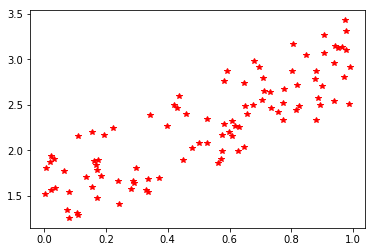

In [3]:
plt.plot(x,y,"r*");

In [4]:
theta_best = (np.linalg.inv(x_new.T.dot(x_new))).dot(x_new.T.dot(y))
theta_best

array([[1.49649759],
       [1.47070516]])

In [5]:
inputt = np.array([[1,0],[1,2]])
inputt

array([[1, 0],
       [1, 2]])

In [8]:
y_prd = inputt.dot(theta_best)
y_prd

array([[1.49649759],
       [4.43790792]])

In [27]:
"""
Error Estamation :- 
MSE = 1/n sum(y_ped - y_true)^2
RMSE = sqrt(MSE)
MAE = 1/n sum abs((y_ped - y_true))"""


'\nError Estamation :- \nMSE = 1/n sum(y_ped - y_true)^2\nRMSE = sqrt(MSE)\nMAE = 1/n sum abs((y_ped - y_true))'

## TEST CASE

In [11]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
print(df.describe())
print(df.info)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [112]:
## feature engineering 
my_df = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_basement','floors','grade','view']]
my_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,floors,grade,view
0,221900.0,3,1.00,1180,5650,0,1.0,7,0
1,538000.0,3,2.25,2570,7242,400,2.0,7,0
2,180000.0,2,1.00,770,10000,0,1.0,6,0
3,604000.0,4,3.00,1960,5000,910,1.0,7,0
4,510000.0,3,2.00,1680,8080,0,1.0,8,0


In [113]:
x_ = my_df.iloc[:,1:].values
x = np.hstack((np.ones((x_.shape[0],1)),x_))
y = my_df.iloc[:,0].values
x 

array([[1.  , 3.  , 1.  , ..., 1.  , 7.  , 0.  ],
       [1.  , 3.  , 2.25, ..., 2.  , 7.  , 0.  ],
       [1.  , 2.  , 1.  , ..., 1.  , 6.  , 0.  ],
       ...,
       [1.  , 2.  , 0.75, ..., 2.  , 7.  , 0.  ],
       [1.  , 3.  , 2.5 , ..., 2.  , 8.  , 0.  ],
       [1.  , 2.  , 0.75, ..., 2.  , 7.  , 0.  ]])

In [114]:
x.shape

(21613, 9)

In [115]:
y.shape

(21613,)

In [116]:
theta_best = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta_best

array([-4.68061290e+05, -3.36670810e+04, -1.77724197e+04,  1.92420188e+02,
       -3.37062334e-01,  3.47043400e+01, -1.33540672e+04,  9.83391836e+04,
        8.94792385e+04])

In [119]:
x_test = np.array([1,3,1.00,1180,5650,0,1.0,7,0])
y_true = 221900.0
y_pred = x_test.dot(theta_best)
mse =(( y_true - y_pred)**2)
mse

8360667330.897964

In [120]:
8360667330.897964

8360667330.897964

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,floors,grade,view
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.323816,0.256794,0.667434,0.397293
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.303093,0.175429,0.356967,0.079532
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.283770,0.500653,0.664983,0.187737
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.435043,0.353949,0.762704,0.284611
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,0.015286,-0.005201,0.113621,0.074710
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,1.000000,-0.245705,0.168392,0.276947
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,-0.245705,1.000000,0.458183,0.029444
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.168392,0.458183,1.000000,0.251321
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.276947,0.029444,0.251321,1.000000
